In [1]:
import pandas as pd
df = pd.read_csv('games.csv')

In [2]:
df['created_at'] = pd.to_datetime(df['created_at']/1000, unit='s', origin='unix')
df['last_move_at'] = pd.to_datetime(df['last_move_at']/1000, unit='s', origin='unix') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20058 non-null  object        
 1   rated           20058 non-null  bool          
 2   created_at      20058 non-null  datetime64[ns]
 3   last_move_at    20058 non-null  datetime64[ns]
 4   turns           20058 non-null  int64         
 5   victory_status  20058 non-null  object        
 6   winner          20058 non-null  object        
 7   increment_code  20058 non-null  object        
 8   white_id        20058 non-null  object        
 9   white_rating    20058 non-null  int64         
 10  black_id        20058 non-null  object        
 11  black_rating    20058 non-null  int64         
 12  moves           20058 non-null  object        
 13  opening_eco     20058 non-null  object        
 14  opening_name    20058 non-null  object        
 15  op

In [4]:
df.shape 

(20058, 16)

In [5]:
df.size 

320928

In [6]:
df.isna().sum() 

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [7]:
df.dtypes

id                        object
rated                       bool
created_at        datetime64[ns]
last_move_at      datetime64[ns]
turns                      int64
victory_status            object
winner                    object
increment_code            object
white_id                  object
white_rating               int64
black_id                  object
black_rating               int64
moves                     object
opening_eco               object
opening_name              object
opening_ply                int64
dtype: object

In [8]:
df.memory_usage()

Index                128
id                160464
rated              20058
created_at        160464
last_move_at      160464
turns             160464
victory_status    160464
winner            160464
increment_code    160464
white_id          160464
white_rating      160464
black_id          160464
black_rating      160464
moves             160464
opening_eco       160464
opening_name      160464
opening_ply       160464
dtype: int64

In [9]:
df.memory_usage().sum() 

2427146

In [10]:
data_kosong = sum(df.isna().sum())
baris = df.shape[0]
kolom = df.shape[1]
 
persentase_data_kosong = data_kosong/(baris * kolom) * 100
print("Persentase data kosong: ", persentase_data_kosong,"%")

Persentase data kosong:  0.0 %


In [11]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
10%,22.000000,1236.000000,1226.000000,2.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
90%,107.000000,1979.000000,1978.000000,9.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [12]:
df['rated'].value_counts()

True     16155
False     3903
Name: rated, dtype: int64

In [13]:
df['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [14]:
df['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [15]:
df['opening_eco'].value_counts()

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A33       1
D22       1
E44       1
B58       1
D19       1
Name: opening_eco, Length: 365, dtype: int64

In [16]:
df['opening_name'].value_counts() 

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_name, Length: 1477, dtype: int64

Text(0, 0.5, 'Jumlah Pemain')

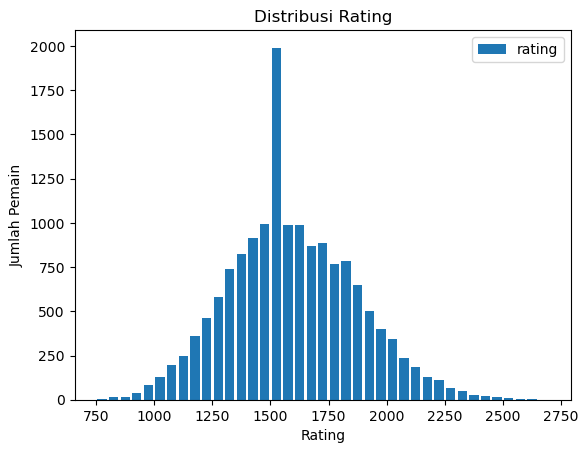

In [17]:
df_white_list = df[["white_id", "white_rating"]].rename({"white_id": "id", "white_rating": "rating"}, axis="columns")
df_black_list = df[["black_id", "black_rating"]].rename({"black_id": "id", "black_rating": "rating"}, axis="columns")
df_player_list = pd.concat([df_white_list, df_black_list]).sort_index(kind="merge")
df_player_list = df_player_list.drop_duplicates(subset="id", keep="last")
rating_plot = df_player_list[["rating"]].plot(kind="hist", bins =range(750,2750,50) , rwidth =0.8, title="Distribusi Rating")
rating_plot.set_xlabel("Rating")
rating_plot.set_ylabel("Jumlah Pemain") 

Text(0, 0.5, 'Jumlah Permainan')

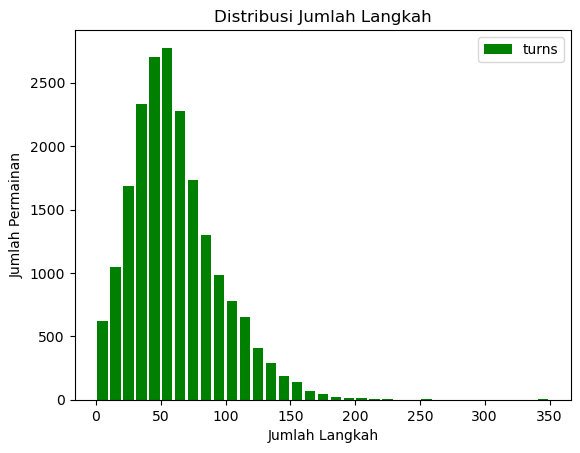

In [18]:
turns_plot = df[["turns"]].plot(kind="hist", bins =range(0,360,10) , rwidth =0.8, title="Distribusi Jumlah Langkah", color='green')
turns_plot.set_xlabel("Jumlah Langkah")
turns_plot.set_ylabel("Jumlah Permainan")

Text(0, 0.5, 'Jumlah Permainan')

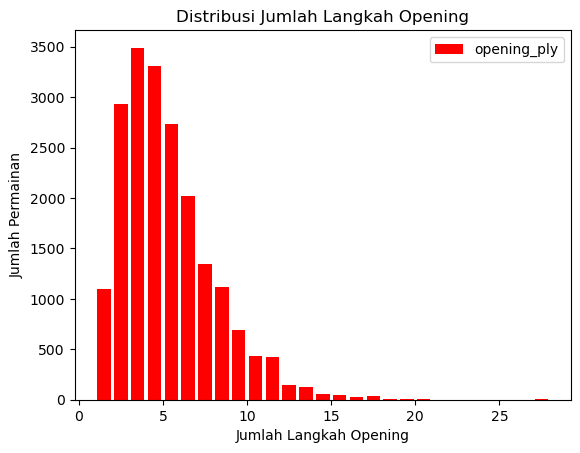

In [19]:
opening_ply_plot = df[["opening_ply"]].plot(kind="hist", bins =range(1,29) , rwidth =0.8, title="Distribusi Jumlah Langkah Opening", color='red')
opening_ply_plot.set_xlabel("Jumlah Langkah Opening")
opening_ply_plot.set_ylabel("Jumlah Permainan")

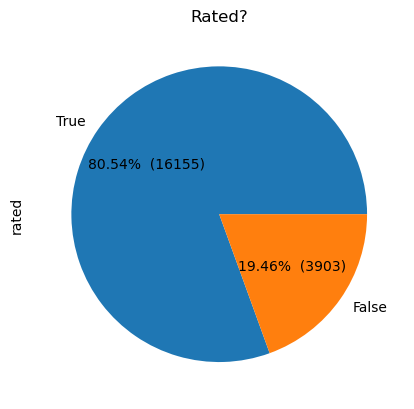

In [20]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
rated_plot = df["rated"].value_counts().plot(kind = "pie", title="Rated?", autopct=make_autopct(list(df["rated"].value_counts())))

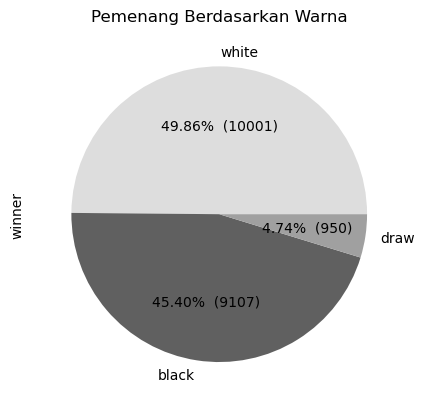

In [21]:
winrate_by_color_value = df["winner"].value_counts()
winrate_by_color_plot = winrate_by_color_value.plot(kind = "pie", title="Pemenang Berdasarkan Warna", colors = ['#DDDDDD', '#606060', '#A0A0A0'],autopct=make_autopct(list(winrate_by_color_value)))

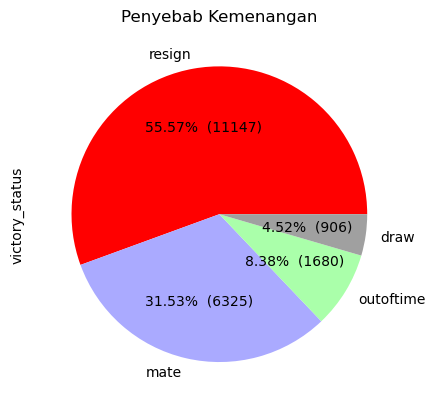

In [22]:
victory_status_plot = df["victory_status"]. value_counts ().plot(kind = "pie", title="Penyebab Kemenangan",colors = ['red', '#AAAAFF', '#AAFFAA','#A0A0A0'], autopct=make_autopct(list(df["victory_status"].value_counts())))

Text(0, 0.5, 'Jumlah Permainan')

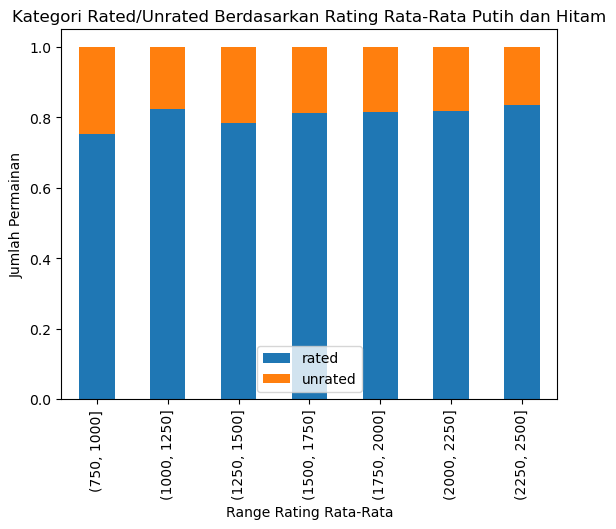

In [23]:
import numpy as np
df['avg_rating'] = df[['white_rating', 'black_rating']].mean(axis=1)
df['unrated'] = df['rated'] ^ 1
rated_by_rating = df.groupby(pd.cut(df["avg_rating"], np.arange(750, 2750, 250))).mean()[['rated', 'unrated']]
rated_by_rating_plot = rated_by_rating.plot(kind="bar", y=["rated","unrated"], stacked=True, title="Kategori Rated/Unrated Berdasarkan Rating Rata-Rata Putih dan Hitam")
rated_by_rating_plot.set_xlabel("Range Rating Rata-Rata")
rated_by_rating_plot.set_ylabel("Jumlah Permainan")

Text(0, 0.5, 'Jumlah Permainan')

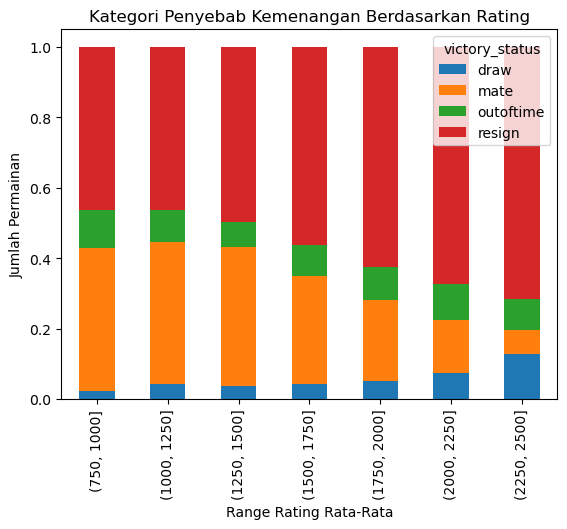

In [24]:
win_plot = df.groupby(pd.cut(df["avg_rating"], np.arange(750, 2750, 250)))['victory_status'].value_counts(normalize=True).unstack().plot(kind="bar",
stacked=True, title="Kategori Penyebab Kemenangan Berdasarkan Rating")
win_plot.set_xlabel("Range Rating Rata-Rata")
win_plot.set_ylabel("Jumlah Permainan")

Text(0, 0.5, 'Jumlah Permainan')

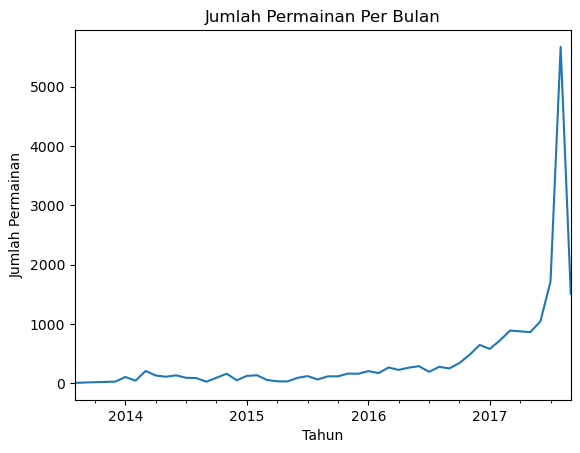

In [25]:
df['month'] = df['created_at'].dt.to_period('M')
game_per_year=df.groupby(df['month']).size().plot(kind="line", title="Jumlah Permainan Per Bulan")
game_per_year.set_xlabel("Tahun")
game_per_year.set_ylabel("Jumlah Permainan")

Text(0, 0.5, 'Rata-Rata Rating')

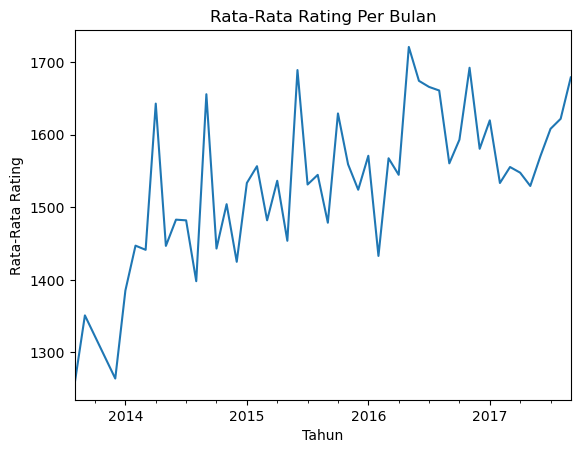

In [26]:
df['month'] = df['created_at'].dt.to_period('M')
game_per_year=df.groupby(df['month'])['avg_rating'].mean().plot(kind="line", title="Rata-Rata Rating Per Bulan")
game_per_year.set_xlabel("Tahun")
game_per_year.set_ylabel("Rata-Rata Rating")

Text(0, 0.5, 'Rating Hitam')

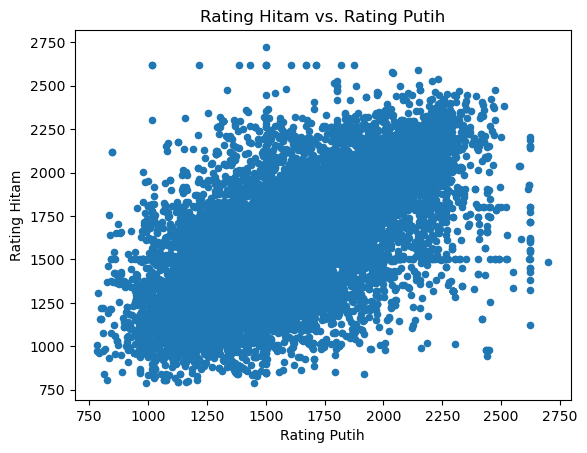

In [27]:
white_v_black_plot = df.plot(kind="scatter", x="white_rating", y="black_rating", title="Rating Hitam vs. Rating Putih")
white_v_black_plot.set_xlabel("Rating Putih")
white_v_black_plot.set_ylabel("Rating Hitam")

Text(0, 0.5, 'Jumlah Langkah')

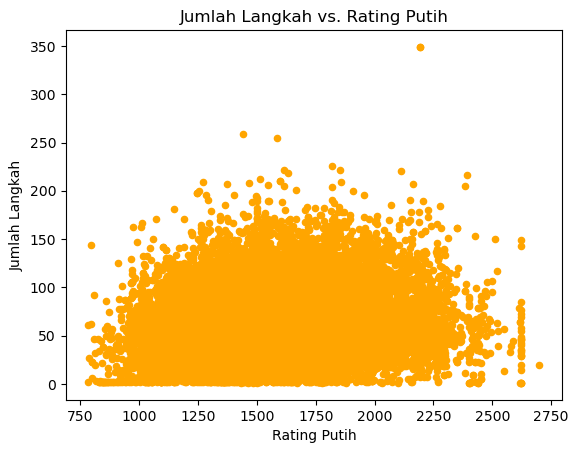

In [28]:
rating_move_plot = df.plot(kind="scatter", x="white_rating", y="turns", title="Jumlah Langkah vs. Rating Putih", color="orange")
rating_move_plot.set_xlabel("Rating Putih")
rating_move_plot.set_ylabel("Jumlah Langkah")

In [29]:
df[['turns', 'white_rating', 'black_rating', 'opening_ply']].corr()

,turns,white_rating,black_rating,opening_ply
turns,1.000000,0.129753,0.160467,0.055999
white_rating,0.129753,1.000000,0.634171,0.277379
black_rating,0.160467,0.634171,1.000000,0.255396
opening_ply,0.055999,0.277379,0.255396,1.000000


<AxesSubplot:>

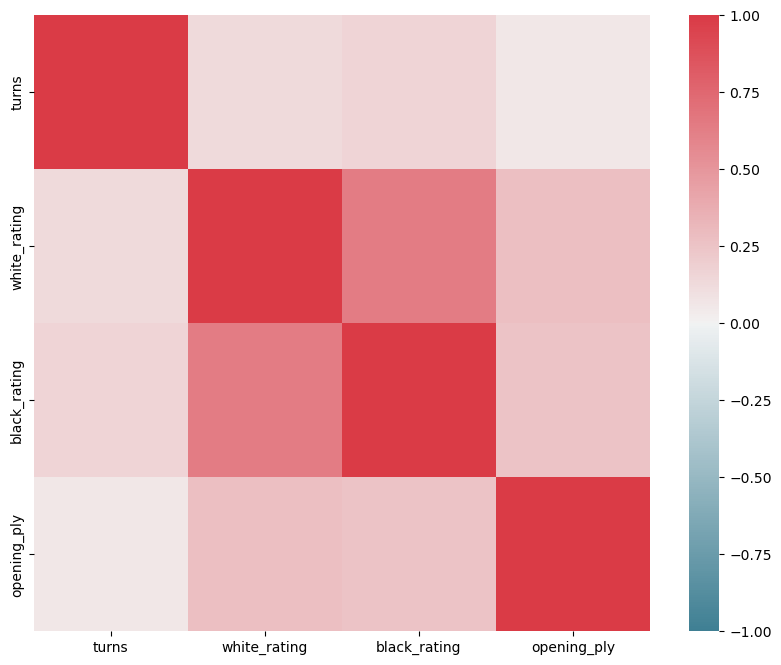

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
 
f, ax = plt.subplots(figsize=(10, 8))
corr = df[['turns', 'white_rating', 'black_rating', 'opening_ply']].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
